In [ ]:
# step1.프로젝트에 필요한 패키지 불러오기
#from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import numpy as np
import Tree
import random
# step2.로그인 정보 및 검색할 회사 미리 정의, 해당 회사의 리뷰 끝 페이지도 정의
usr = "yeschan119@naver.com"
pwd = "yeschan119"
query = "직방"
page = 20

# step3.크롬드라이버 실행 및 잡플래닛 로그인

driver = webdriver.Chrome("/Users/eungchan/desktop/apply/chromedriver")

driver.get("https://www.jobplanet.co.kr/users/sign_in?_nav=gb")

time.sleep(2)

login_id = driver.find_element_by_css_selector("input#user_email")
login_id.send_keys(usr)

login_pwd = driver.find_element_by_css_selector("input#user_password")
login_pwd.send_keys(pwd)

login_id.send_keys(Keys.RETURN)
time.sleep(3)

# step4.원하는 회사의 리뷰 페이지까지 이동
search_query = driver.find_element_by_css_selector("input#search_bar_search_query")
search_query.send_keys(query)
search_query.send_keys(Keys.RETURN)
time.sleep(3)

# 리뷰 버튼
#review = driver.find_element_by_css_selector("#job_search_app > div > div.job_search_content > div.job_search_detail > div > div > div.job_posting_tab > ul > li.on > button")
driver.find_element_by_xpath('//*[@id="job_search_app"]/div/div[2]/div[2]/div/div/div[3]/ul/li[2]/button').click()
time.sleep(10)
# 전체 보기 버튼
#driver.find_element_by_xpath('//*[@id="job_search_app"]/div/div[2]/div[2]/div/div/div[4]/div[1]/div/div[1]/a').click()
#time.sleep(15)

#driver.find_element_by_css_selector("a.tit").click()
#time.sleep(5)

#driver.find_element_by_css_selector("button.btn_close_x_ty1 ").click()
#time.sleep(3)

# step6.크롤링한 정보를 담을 리스트명 정의
list_div = []
list_cur = []
list_date =[]
list_stars = []
list_bl_scores = []
list_promotion = []
list_welfare = []
list_work_balance = []
list_culture = []
list_ceo = []
list_summery = []
list_merit = []
list_disadvantages = []
list_managers =[]
list_recommend = []
option = [True, False]
def count_star1(a, List):
    star = int(a[7:9])
    if star <= 30:
        List.append("CCC")
    elif star <= 50:
        List.append("BBB")
    elif star <= 70:
        List.append("A")
    elif star <= 90:
        List.append("AA")
    else:
        List.append("AAA")
next = 3

def count_star(a, List):
    star = int(a[7:9])
    List.append(star)

next = 3

# step7.원하는 회사의 직무/근속여부/일시/요약/평점/장점/단점/경영진에게 바라는 점 크롤링 (for문으로 반복)
for i in range(page): 

    #직무, 근속여부, 일시
    user_info = driver.find_elements_by_css_selector("span.txt1")

    count = int(len(user_info)/4)
    #print(count)

    list_user_info = []

    for j in user_info:
        list_user_info.append(j.text)

    for j in range(count):            #한 페이지에 정보 5set씩 나옴. 마지막 페이지는 5개 미만일 수 있으므로 count 변수를 반복횟수로 넣어줌.
        a = list_user_info[4*j]
        list_div.append(a)
        
        b = list_user_info[4*j+1]
        list_cur.append(b)

        c = list_user_info[4*j+3]
        list_date.append(c)

    #별점
    stars = driver.find_elements_by_css_selector("div.star_score")
    for j in stars:
        a = j.get_attribute('style')
        count_star(a, list_stars)

    bl_scores = driver.find_elements_by_css_selector("div.bl_score")
    for j in bl_scores:
        #bl = driver.find_elements_by_css_selector("div.bl_score")
        list_bl_scores.append(j.get_attribute('style'))
    for j in range(count):
        a = list_bl_scores[5 * j]
        count_star(a, list_promotion)
        b = list_bl_scores[5 * j +1]
        count_star(b, list_welfare)
        c = list_bl_scores[5 * j + 2]
        count_star(c, list_work_balance)
        d = list_bl_scores[5 * j + 3]
        count_star(d, list_culture)
        e = list_bl_scores[5 * j + 4]
        count_star(e, list_ceo)
    #요약 정보
    summery = driver.find_elements_by_css_selector("h2.us_label")

    for j in summery:
        list_summery.append(j.text)
    
    #장점, 단점, 경영진에게 바라는 점
    list_review = []

    review = driver.find_elements_by_css_selector("dd.df1")

    for j in review:
        list_review.append(j.text)

    for j in range(count):            #한 페이지에 정보 5set씩 나옴. 마지막 페이지는 5개 미만일 수 있으므로 count 변수를 반복횟수로 넣어줌.
        a = list_review[3*j]
        list_merit.append(a)
        
        b = list_review[3*j+1]
        list_disadvantages.append(b)

        c = list_review[3*j+2]
        list_managers.append(c)

    # 다음 페이지 클릭 후 for문 진행, 끝 페이지에서 다음 페이지 클릭 안되는 것 대비해서 예외처리 구문 추가
    try:
        driver.find_element_by_css_selector("a.btn_pgnext").click()
        time.sleep(10)
    except:
        print("except")
        pass

# step8.pandas 라이브러리로 표 만들기
structure_data = pd.DataFrame()
unstructured_data = pd.DataFrame()
#total_data['날짜'] = pd.Series(list_date)
#total_data['직무'] = pd.Series(list_div)
#total_data['재직여부'] = pd.Series(list_cur)
structure_data['승진기회'] = pd.Series(list_promotion)
structure_data['복지'] = pd.Series(list_welfare)
structure_data['워라벨'] = pd.Series(list_work_balance)
structure_data['사내문화'] = pd.Series(list_culture)
structure_data['경영진'] = pd.Series(list_ceo)
structure_data['등급'] = pd.Series(list_stars)
unstructured_data['요약'] = pd.Series(list_summery)
unstructured_data['장점'] = pd.Series(list_merit)
unstructured_data['단점'] = pd.Series(list_disadvantages)
unstructured_data['경영진에게 바라는 점'] = pd.Series(list_managers)

# step9.엑셀 형태로 저장하기
structure_data.to_csv(query + " final.csv" ,sep='\t')
#structure_data.to_csv(query + " train_n.txt" ,sep='\t', index=False)
#unstructured_data.to_csv(query + " unstructured_review.txt" ,sep='\t')
#total_data.to_excel(query + "리뷰.xlsx" ,index=True)
#total_data.to_csv(query+".txt", sep ='\t', index = False)
# step10.크롬 드라이버 종료
driver.close()

#test_data.to_csv("result_csv.csv", sep='\t')

92.0 일치


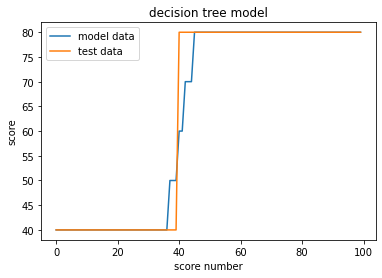

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
result = pd.read_csv("result_data.csv",sep='\t')
test = pd.read_csv("final2.csv", sep=",")

r_data = list(result['등급'].values)
t_data = list(test['등급'].values)

count = 0
new_data = []
old_data = []
for i in range(len(r_data)):
    if r_data[i] == t_data[i]:
        count += 1

print((count / len(r_data)) * 100 ,"일치")
np.random.seed(0)

x = [i for i in range(len(r_data))]

plt.plot(x, sorted(t_data), x, sorted(r_data))
plt.xlabel("score number")
plt.ylabel("score")
plt.title("decision tree model")
plt.legend(['model data','test data'])
plt.show()